In [17]:
import matplotlib.pyplot as plt
import csv
import math

In [137]:
x_crds = []
y_crds = []

with open('coordinates.csv', newline='') as coordinates:
    reader = csv.reader(coordinates, delimiter=',')
    row_num = 0
    for row in reader:
        if row_num == 0:
            row_num += 1
        else:
            x_crds.append(float(row[1]))
            y_crds.append(float(row[2]))

In [138]:
pickup_time = 1
dropoff_time = 2
pickup_location = 7

districts = 263
z_1 = [0 for i in range(districts)]
z_2 = [0 for i in range(districts)]

with open('ycd.csv', newline='') as ycd:
    reader = csv.reader(ycd, delimiter=',')
    row_num = 0
    for row in reader:
        if row_num == 0:
            row_num += 1
        else:
            if int(row[pickup_location]) - 1 < districts:
                # how often people are picked up from here
                z_1[int(row[pickup_location]) - 1] += 1
                # how long the trips usually last from here
                pickup_split = row[pickup_time].split(' ')[1].split(':')
                dropoff_split = row[dropoff_time].split(' ')[1].split(':')
                p_time = float(pickup_split[0]) * 60 + float(pickup_split[1]) + float(pickup_split[2]) / 60
                d_time = float(dropoff_split[0]) * 60 + float(dropoff_split[1]) + float(dropoff_split[2]) / 60
                duration = d_time - p_time
                if duration < 0:
                    duration += 24 * 60
                z_2[int(row[pickup_location]) - 1] += duration

removed = 0                
for i in range(districts):
    if z_1[i - removed] != 0:
        z_2[i - removed] /= z_1[i - removed]
    else:
        del x_crds[i - removed]
        del y_crds[i - removed]
        del z_1[i - removed]
        del z_2[i - removed]
        removed += 1

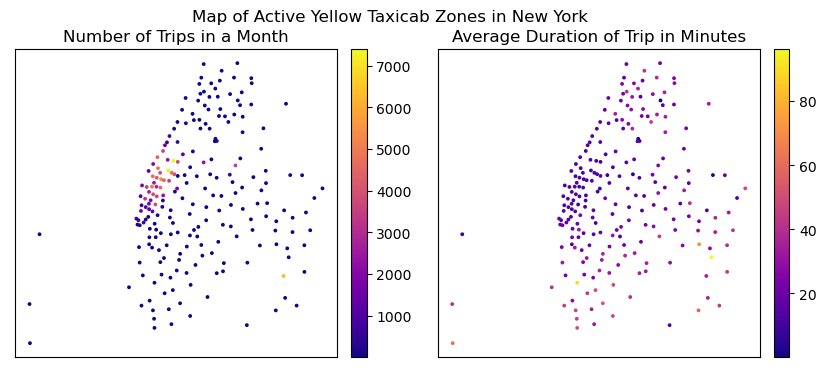

In [143]:
fig, axs = plt.subplots(1, 2, figsize=(10,4), gridspec_kw={'height_ratios': [1]})
frequency = axs[0].scatter(x_crds, y_crds, s=3, c=z_1, cmap='plasma')
duration = axs[1].scatter(x_crds, y_crds, s=3, c=z_2, cmap='plasma')
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[1].set_xticks([])
axs[1].set_yticks([])
fig.suptitle("Map of Active Yellow Taxicab Zones in New York")
axs[0].set_title("Number of Trips in a Month")
axs[1].set_title("Average Duration of Trip in Minutes")
plt.colorbar(frequency, fraction=0.0451, pad=0.04)
plt.colorbar(duration, fraction=0.0451, pad=0.04)
plt.show()